# Libreria

In [1]:
import openpyxl
import matplotlib.pyplot as plt
import numpy as np

# Lettura file

In [2]:
wb_obj = openpyxl.load_workbook('asta.xlsx')
sheet = wb_obj.active

colonne = []
for column in sheet.iter_cols(1, sheet.max_column):
    colonna = []
    for j in range (0,29):
        colonna.append(column[j].value)
        
    colonne.append(colonna)

squadre = []
for i in range(8):
    lista = list(zip(colonne[2*i], colonne[2*i+1]))
    squadra = {
        'nome': lista[0][0],
        'rosa': [s for s in lista[1:] if s != (None,None)]
    }
    squadre.append(squadra)

# Funzioni get ruoli

In [3]:
def getPor(squadra):
    return squadra['rosa'][:3]

def getDif(squadra):
    return squadra['rosa'][3:11]

def getCen(squadra):
    return squadra['rosa'][11:19]

def getAtt(squadra):
    return squadra['rosa'][19:26]

In [4]:
print(getAtt(squadre[6]))

[('Lapadula', 21.0), ('Rebic', 108.0), ('Simy', 4.0), ('Zapata', 505.0), ('Berardi', 91.0), ('kouame ', 1.0)]


# Funzioni calcolo

In [5]:
def costoRosa(squadra):
    return sum([g[1] for g in squadra['rosa']])

def costoPor(squadra):
    return sum([g[1] for g in squadra['rosa'][:3]])

def costoDif(squadra):
    return sum([g[1] for g in squadra['rosa'][3:11]])

def costoCen(squadra):
    return sum([g[1] for g in squadra['rosa'][11:19]])

def costoAtt(squadra):
    return sum([g[1] for g in squadra['rosa'][19:26]])

In [6]:
print(costoCen(squadre[6]))

411.0


In [7]:
def pieGraphRosa(squadra):
    labels = 'Por', 'Dif', 'Cen', 'Att', 'Res'
    crediti_res = 1500 - costoPor(squadra) - costoDif(squadra) - costoCen(squadra) - costoAtt(squadra)
    sizes = [costoPor(squadra), costoDif(squadra), costoCen(squadra), costoAtt(squadra), crediti_res]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(squadra['nome'])
    plt.show()

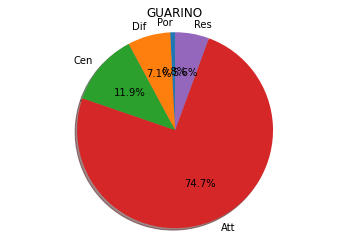

In [8]:
pieGraphRosa(squadre[4])

# Confronto squadre

In [9]:
def confrontoSpesaPor():    
    labels = [s['nome'][:3] for s in squadre]
    spesa = [costoPor(s) for s in squadre]

    x = np.arange(len(labels))  # the label locations
    width = 0.35     # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, spesa, width, label='Spesa')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Spesa')
    ax.set_title('Spesa porta per squadra')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)

    fig.tight_layout()

    plt.show()
    
def confrontoSpesaDif():    
    labels = [s['nome'][:3] for s in squadre]
    spesa = [costoDif(s) for s in squadre]

    x = np.arange(len(labels))  # the label locations
    width = 0.35     # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, spesa, width, label='Spesa')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Spesa')
    ax.set_title('Spesa difesa per squadra')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)

    fig.tight_layout()

    plt.show()
    
def confrontoSpesaCen():    
    labels = [s['nome'][:3] for s in squadre]
    spesa = [costoCen(s) for s in squadre]

    x = np.arange(len(labels))  # the label locations
    width = 0.35     # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, spesa, width, label='Spesa')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Spesa')
    ax.set_title('Spesa centrocampo per squadra')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)

    fig.tight_layout()

    plt.show()
    
def confrontoSpesaAtt():    
    labels = [s['nome'][:3] for s in squadre]
    spesa = [costoAtt(s) for s in squadre]

    x = np.arange(len(labels))  # the label locations
    width = 0.35     # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, spesa, width, label='Spesa')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Spesa')
    ax.set_title('Spesa attacco per squadra')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)

    fig.tight_layout()

    plt.show()

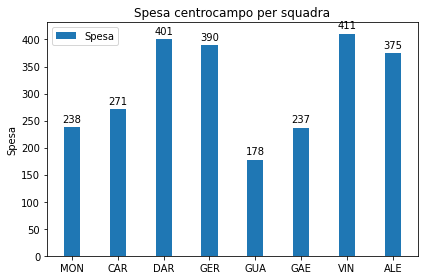

In [10]:
confrontoSpesaCen()

# Grafici divisione budget

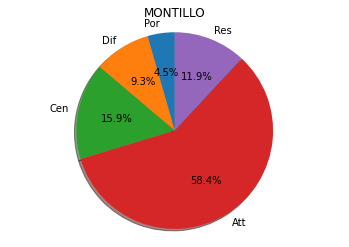

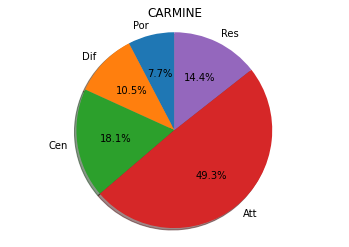

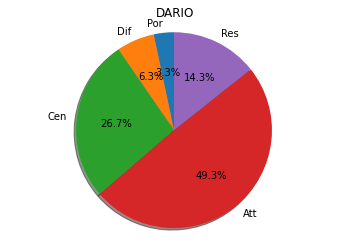

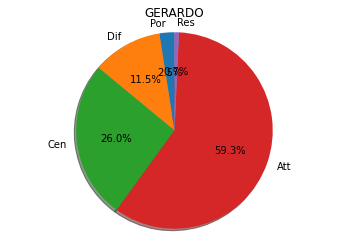

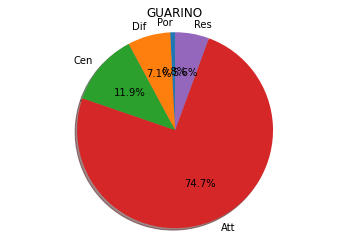

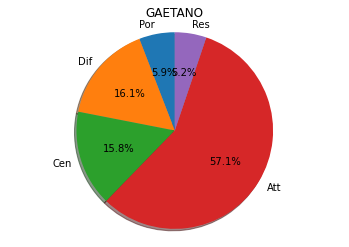

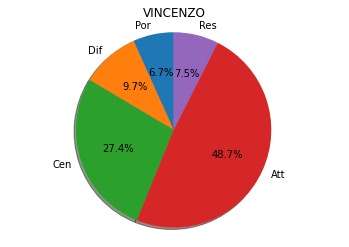

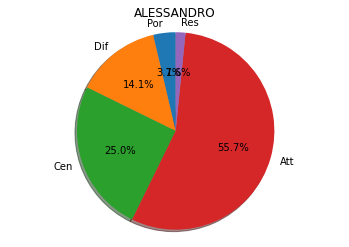

In [11]:
for i in range(8):
    pieGraphRosa(squadre[i])

# Grafici confronto spesa per reparto

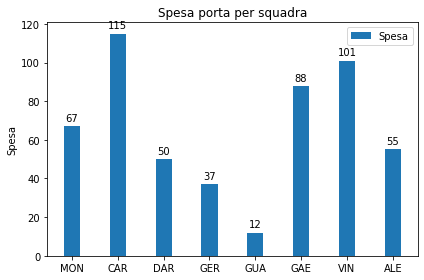

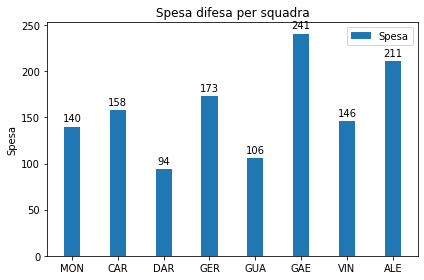

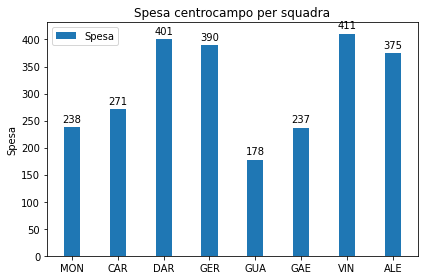

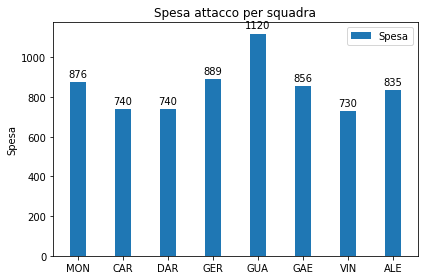

In [12]:
confrontoSpesaPor()
confrontoSpesaDif()
confrontoSpesaCen()
confrontoSpesaAtt()